In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heating Load

In [3]:
data = pd.read_excel(r"C:\Users\CTTC1\Downloads\ENB2012_data.xlsx")
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
data.columns = ['relative_compactness','surface_area','wall_area','roof_area','overall_height','orientation','glazing_area','glazing_area_distribution','heating_load','cooling_load']
data

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# No data cleaning

In [5]:
for i in data.columns:
    print(i,':',sum(data[i]=='?'))

relative_compactness : 0
surface_area : 0
wall_area : 0
roof_area : 0
overall_height : 0
orientation : 0
glazing_area : 0
glazing_area_distribution : 0
heating_load : 0
cooling_load : 0


In [6]:
for i in data.columns:
    print(i,':',sum(data[i]==' ?'))

relative_compactness : 0
surface_area : 0
wall_area : 0
roof_area : 0
overall_height : 0
orientation : 0
glazing_area : 0
glazing_area_distribution : 0
heating_load : 0
cooling_load : 0


In [7]:
data.describe(include='all')        #describes about all the numeric and string valued columns

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
#dropping a column
data = data.drop(['cooling_load'],axis=1)

# Data analysis

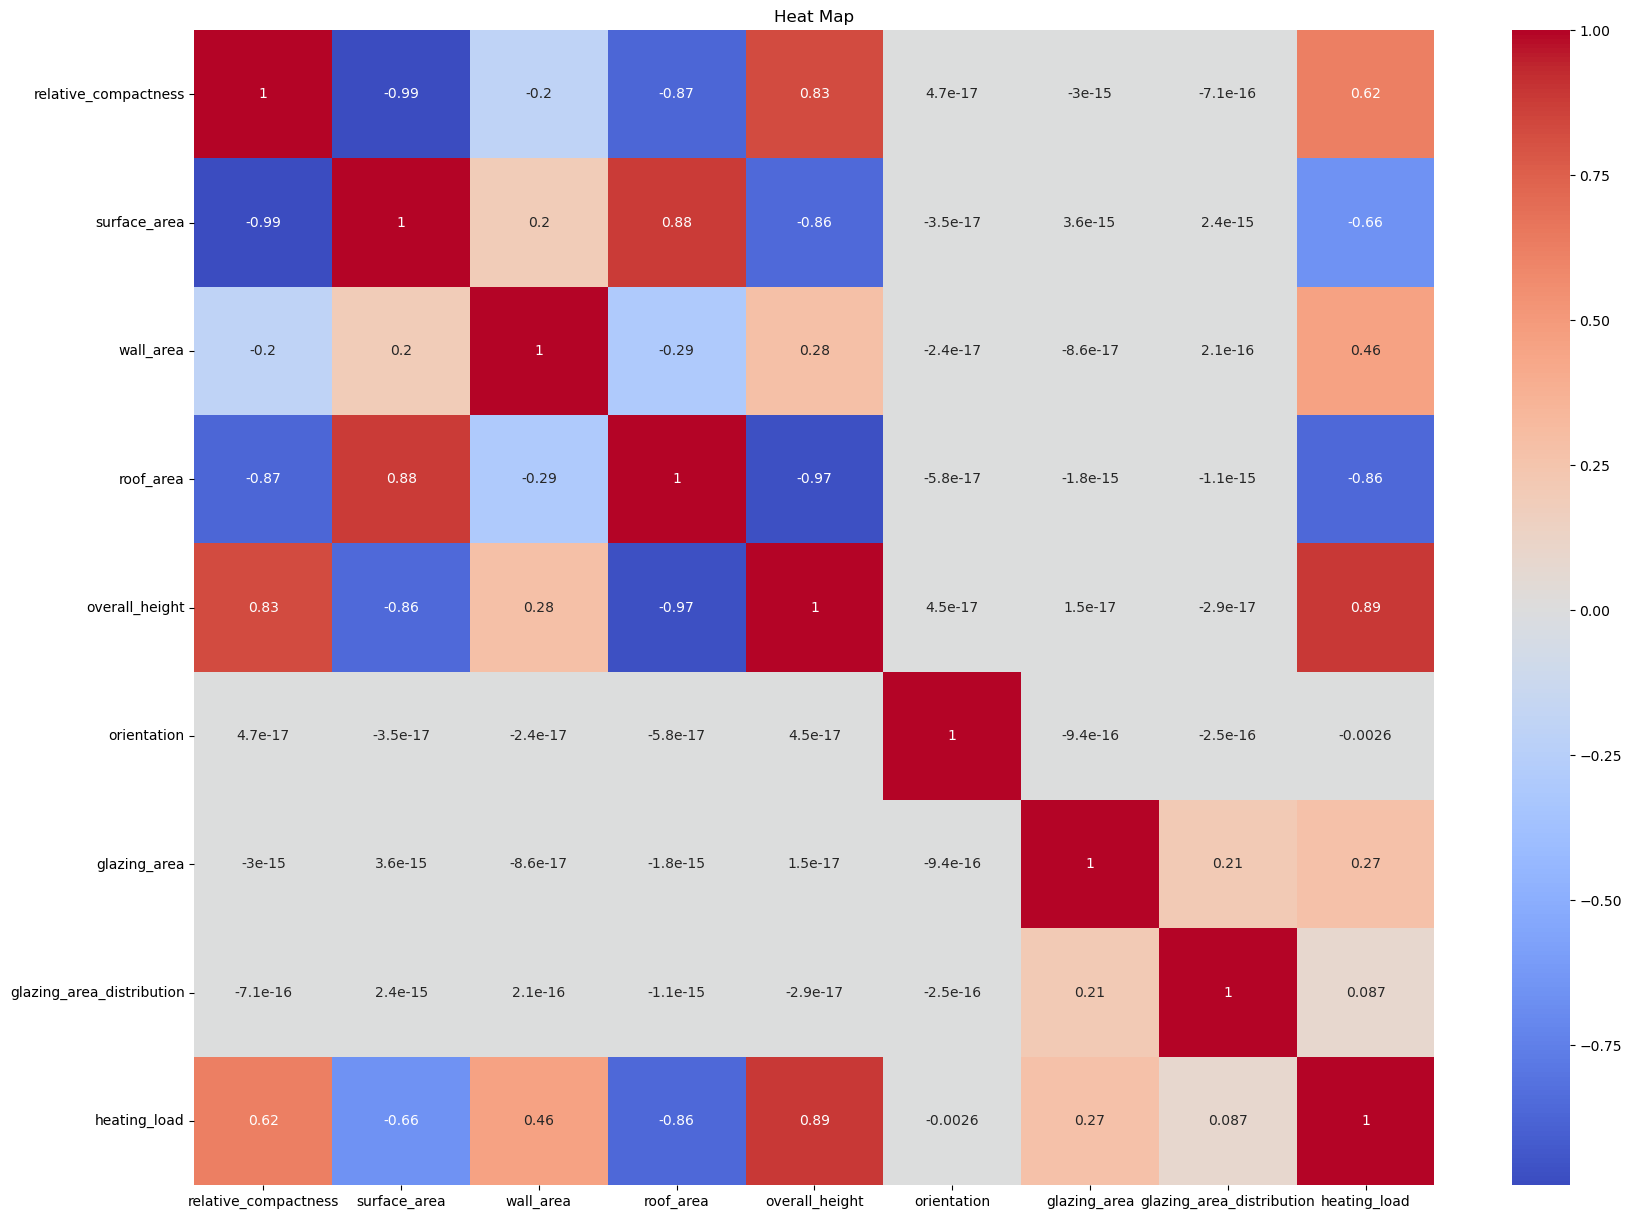

In [9]:
#heat map

cor = data.corr()
plt.figure(figsize=(20,15.))
sns.heatmap(cor,annot=True,cmap='coolwarm')     #cmap changes the colour coding of the heatmap
plt.title('Heat Map')
plt.show()

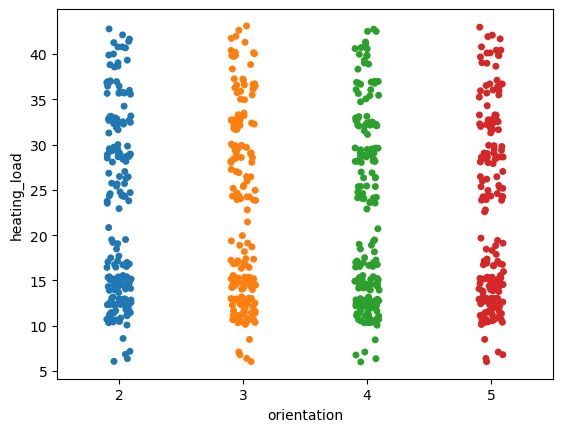

In [10]:
#relation between orientation and heating_load
sns.stripplot(x=data.orientation,y=data.heating_load,data=data)
plt.show()

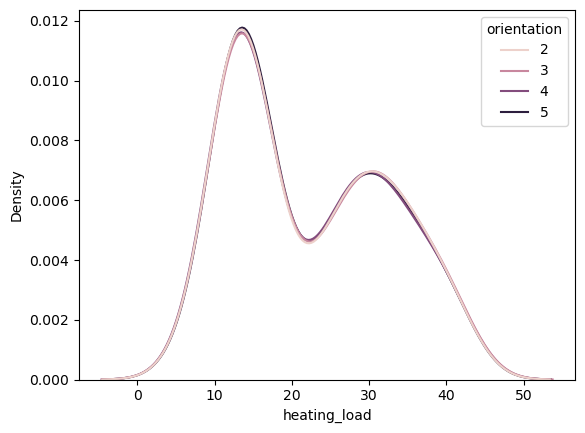

In [11]:
#plt.figure(figsize=(50,40))
sns.kdeplot(x=data.heating_load,hue=data.orientation)
plt.show()

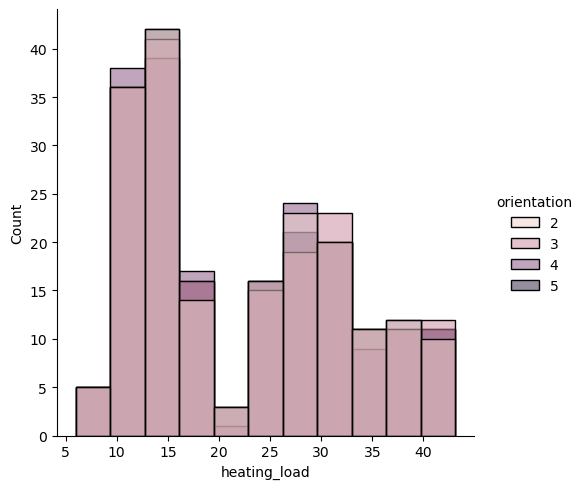

In [12]:
sns.displot(x=data.heating_load,hue=data.orientation)
plt.show()

C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


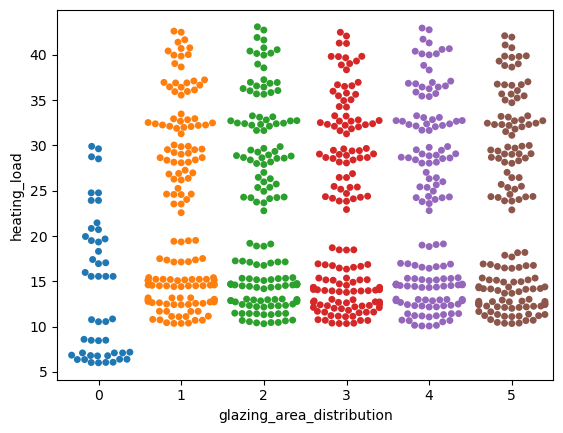

In [24]:
#relation between glazing_area_distribution and heating_load
sns.swarmplot(x=data.glazing_area_distribution,y=data.heating_load,data=data)
plt.show()

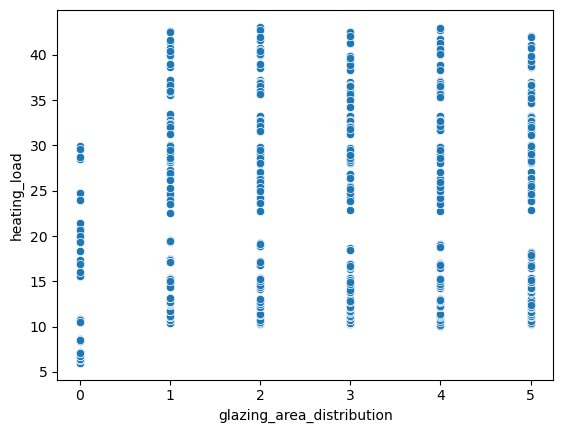

In [14]:
sns.scatterplot(x=data.glazing_area_distribution,y=data.heating_load,data=data)
plt.show()

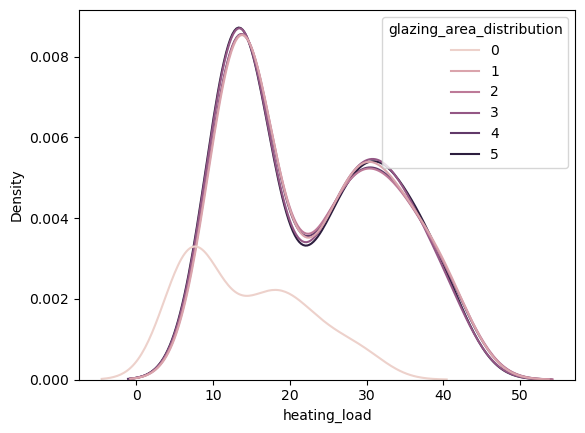

In [15]:
sns.kdeplot(x=data.heating_load,hue=data.glazing_area_distribution,data=data)
plt.show()

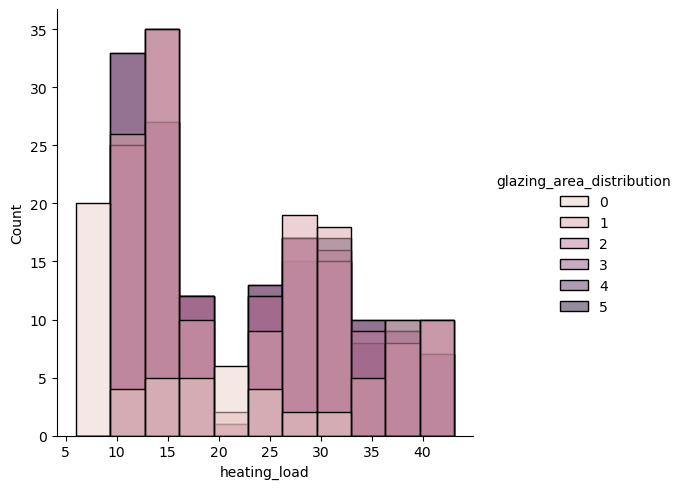

In [16]:
sns.displot(x=data.heating_load,hue=data.glazing_area_distribution,data=data)
plt.show()

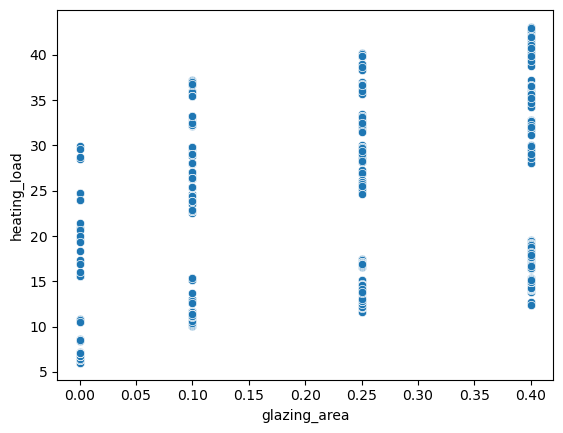

In [27]:
#relation between glazing_area and heating_load
sns.scatterplot(x=data.glazing_area,y=data.heating_load)
plt.show()

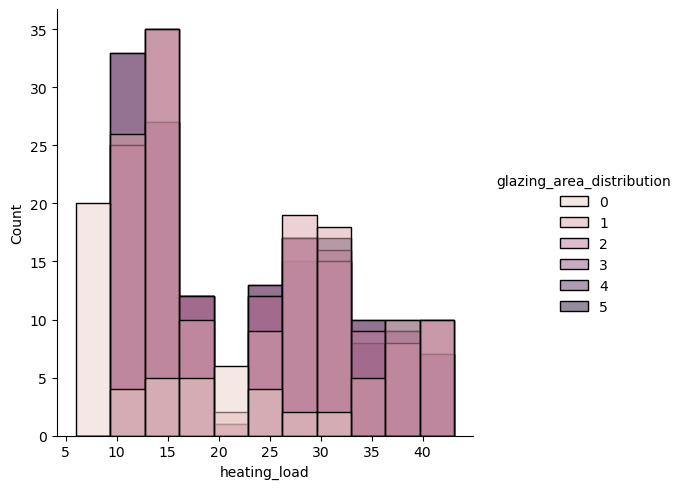

In [18]:
sns.displot(x=data.heating_load,hue=data.glazing_area_distribution,data=data)
plt.show()

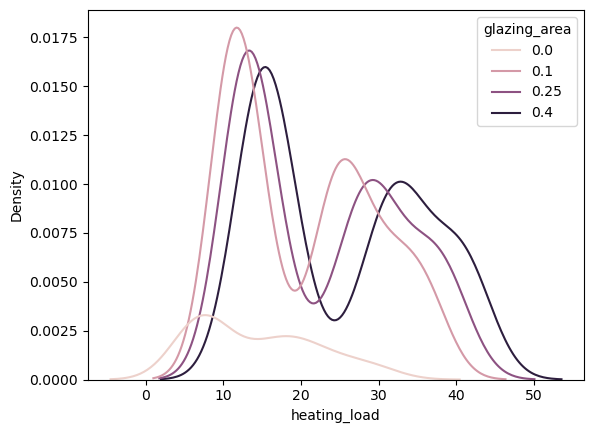

In [19]:
sns.kdeplot(x=data.heating_load,hue=data.glazing_area,data=data)
plt.show()

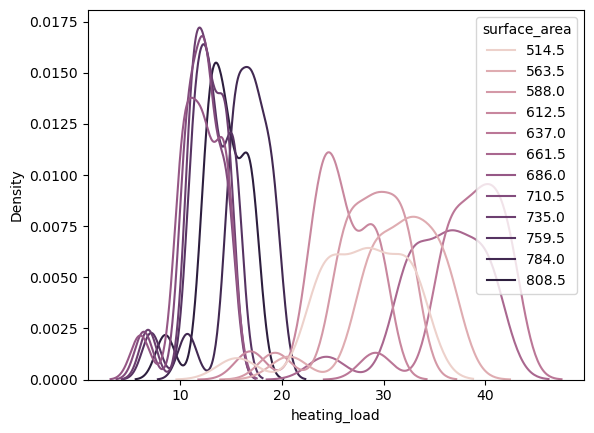

In [20]:
sns.kdeplot(x=data.heating_load,hue=data.surface_area,data=data)
plt.show()

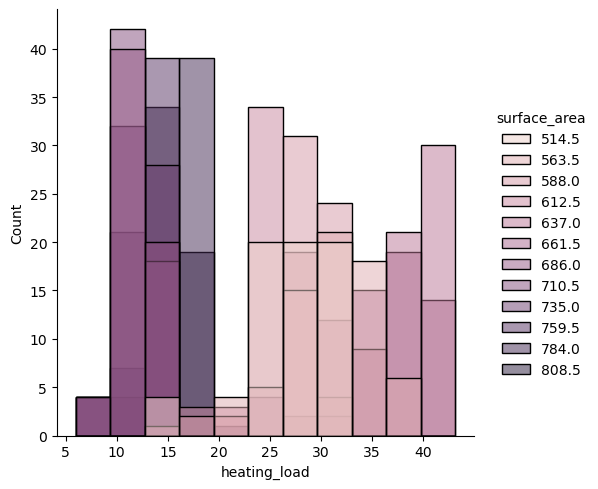

In [21]:
sns.displot(x=data.heating_load,hue=data.surface_area,data=data)
plt.show()

In [22]:
data.drop(['orientation'],axis=1,inplace=True)          #removing unwanted columns that are not needed for our ML model
data

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution,heating_load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48


# IP/OP creation

In [42]:
ip = data.drop('heating_load',axis=1)
op = data.heating_load

In [43]:
ip.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution
0,0.98,514.5,294.0,110.25,7.0,0.0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,0


In [44]:
op.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: heating_load, dtype: float64

# Train Test Split

In [46]:
#sklearn is ML library, scikit learn

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=10)
x_train

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution
120,0.74,686.0,245.0,220.5,3.5,0.10,2
172,0.71,710.5,269.5,220.5,3.5,0.10,3
307,0.79,637.0,343.0,147.0,7.0,0.25,1
7,0.90,563.5,318.5,122.5,7.0,0.00,0
448,0.79,637.0,343.0,147.0,7.0,0.25,4
...,...,...,...,...,...,...,...
369,0.69,735.0,294.0,220.5,3.5,0.25,2
320,0.69,735.0,294.0,220.5,3.5,0.25,1
527,0.62,808.5,367.5,220.5,3.5,0.25,5
125,0.71,710.5,269.5,220.5,3.5,0.10,2


# Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)yp

# ML Modeling

In [48]:
#linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
yp = lr.predict(x_test)          #'yp' means y-predicted
print(yp)

[18.13450688 19.01152852 11.78553322 28.22079762 18.76347568  5.60771114
 11.89873016 29.62632267 32.65783862 15.55995747 29.45432041 14.36008263
  9.3821354  30.0456352  33.24915341 17.88645404 39.983215   10.6788834
 31.60999412 10.04950078 29.03500788 12.81414838 32.44818235 29.24510098
 15.10224836 26.04114594 12.39483585 31.81965039 29.24466415 16.41855444
 11.99518948 11.47941763 12.81414838 33.03949714 31.63397209 29.03500788
 32.02886982  8.16270248 15.59835405 26.25080221 16.20889818 26.25080221
 31.60999412 29.837666   33.0411842  40.19287126 15.10224836 32.23852609
  8.37235874 33.99549111 10.01151803 35.0231686  12.60449211 16.01766658
 34.41817777 17.46714151 13.88240161 11.89873016 11.06010509 27.26311659
 31.81921356 16.01766658 15.80801032 33.24915341 19.01152852 14.47327957
  6.8275579  31.81965039  9.5922055  30.79534703 40.19287126 16.22732285
 34.2085215  11.68907389 32.65783862 15.57992938 26.04114594 15.14064494
 16.45695102 19.43084106 30.46663479 15.35030121 33.

# MSE and R2 Score

In [50]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

b = mean_squared_error(y_test,yp)
c = r2_score(y_test,yp)

print('Mean Squared Error is:',b)
print('R2 Score is:',c)

Mean Squared Error is: 7.040892290243675
R2 Score is: 0.9286377977537824


# Cooling load

In [57]:
data = pd.read_excel(r"C:\Users\CTTC1\Downloads\ENB2012_data.xlsx")
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [58]:
data.columns = ['relative_compactness','surface_area','wall_area','roof_area','overall_height','orientation','glazing_area','glazing_area_distribution','heating_load','cooling_load']
data

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [59]:
data.describe(include='all')        #describes about all the numeric and string valued columns

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [60]:
#dropping a column
data = data.drop(['heating_load'],axis=1)

In [61]:
data

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


# Data analysis

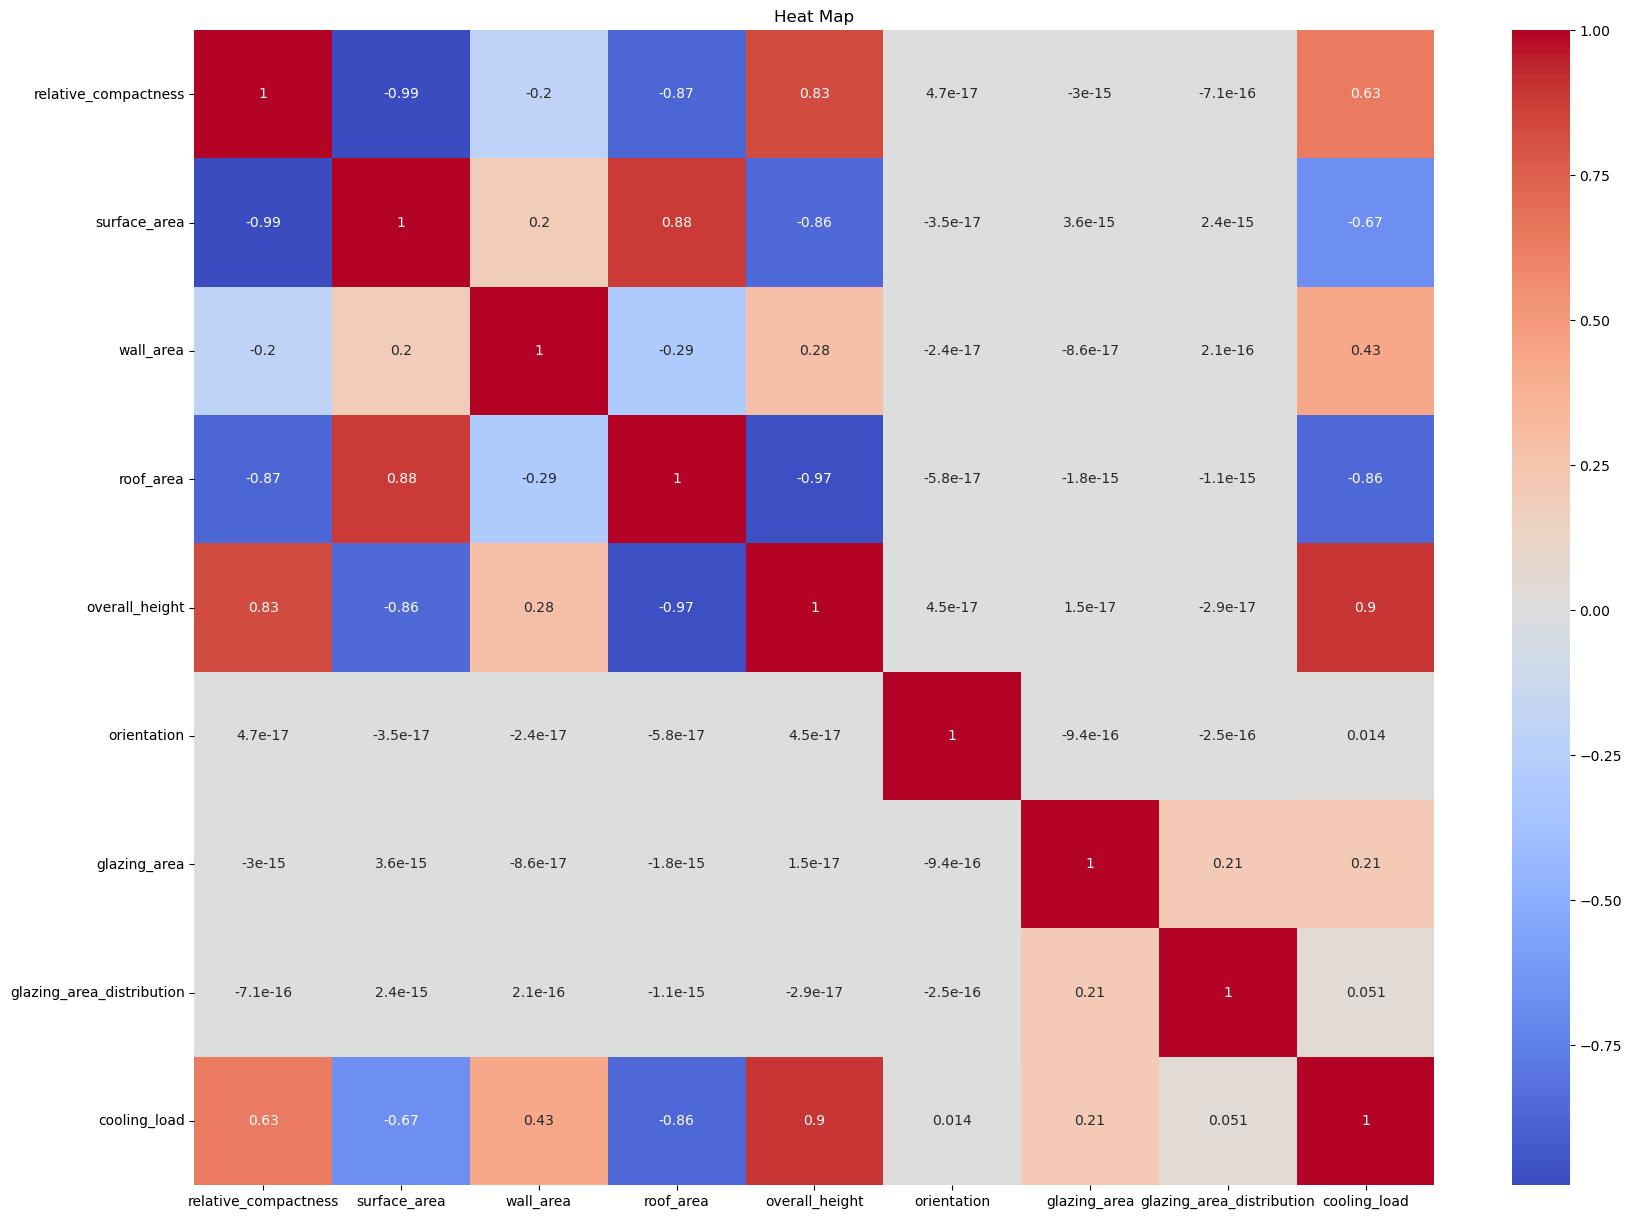

In [62]:
#heat map

cor = data.corr()
plt.figure(figsize=(20,15.))
sns.heatmap(cor,annot=True,cmap='coolwarm')     #cmap changes the colour coding of the heatmap
plt.title('Heat Map')
plt.show()